In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv("./applicants_data.csv")

applicant_data_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=["EIN","NAME"])

applicant_data_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

#Encode categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

In [7]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables))

encoded_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
#Wanted to see what it changed too. 

encoded_df.dtypes

APPLICATION_TYPE_T10        float64
APPLICATION_TYPE_T12        float64
APPLICATION_TYPE_T13        float64
APPLICATION_TYPE_T14        float64
APPLICATION_TYPE_T15        float64
                             ...   
INCOME_AMT_25000-99999      float64
INCOME_AMT_50M+             float64
INCOME_AMT_5M-10M           float64
SPECIAL_CONSIDERATIONS_N    float64
SPECIAL_CONSIDERATIONS_Y    float64
Length: 114, dtype: object

In [9]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
numerical_variables_df = applicant_data_df.drop(columns = categorical_variables)

numerical_variables_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1,5000,1
1,1,108590,1
2,1,5000,0
3,1,6692,1
4,1,142590,1


In [10]:
# Using the Pandas concat function, combining the dataframes

attition_df = pd.concat([numerical_variables_df, encoded_df], axis=1)

attition_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Define the target set y using the IS_SUCCESSFUL column

y = attition_df["IS_SUCCESSFUL"]

y.head()

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [12]:
X = attition_df.drop(columns=["IS_SUCCESSFUL"])

X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [16]:
# Define the number of neurons in the output layer
number_output_neurons = len(X_train.iloc[0])

number_output_neurons

116

In [17]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 1) // 2

hidden_nodes_layer1

58

In [18]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

hidden_nodes_layer2

29

In [19]:
# Create the Sequential model instance
nn = Sequential()

In [20]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function

nn.add(Dense(units=1, activation="sigmoid"))

In [21]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 5s 4ms/step - loss: 0.5732 - accuracy: 0.7228
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5518 - accuracy: 0.7312
Epoch 3/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5488 - accuracy: 0.7311
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5470 - accuracy: 0.7327
Epoch 5/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5459 - accuracy: 0.7346
Epoch 6/50
804/804 [==============================] - 4s 4ms/step - loss: 0.5447 - accuracy: 0.7339
Epoch 7/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5438 - accuracy: 0.7337
Epoch 8/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5431 - accuracy: 0.7343
Epoch 9/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5420 - accuracy: 0.7348
Epoch 10/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5419 - accuracy: 0.7354

In [24]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

#Display the model loss and accuracy results
print(f"Loss; {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5545 - accuracy: 0.7299 - 1s/epoch - 5ms/step
Loss; 0.5544908046722412, Accuracy: 0.729912519454956


In [25]:
# Set the model's file path
file_path = Path("AlphabetSoup.h5")

#Export model to a HDF5 file
nn.save(file_path)

In [40]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

number_input_features

116

In [91]:
# Define the number of neurons in the output layer
# Define the number of neurons in the output layer
number_output_neurons_A1 = len(X_train.iloc[:10])


number_output_neurons_A1

10

In [92]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 =  (number_input_features + 1) // 2



hidden_nodes_layer1_A1

58

In [93]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [94]:
# First hidden layer
# Add the first hidden layer
nn_A1.add(Dense(hidden_nodes_layer1_A1, input_dim=number_input_features, activation="relu"))



# Output layer
nn_A1.add(Dense(units=1, activation="sigmoid"))

nn_A1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 58)                6786      
                                                                 
 dense_27 (Dense)            (None, 1)                 59        
                                                                 
Total params: 6,845
Trainable params: 6,845
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [96]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5853 - accuracy: 0.7186
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5598 - accuracy: 0.7276
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5543 - accuracy: 0.7313
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5514 - accuracy: 0.7306
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.7314
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7305
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.7319
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5480 - accuracy: 0.7320
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7321
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5465 - accuracy: 0.7327

In [97]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

#Display the model loss and accuracy results
print(f"Loss; {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5542 - accuracy: 0.7314 - 387ms/epoch - 1ms/step
Loss; 0.5542263984680176, Accuracy: 0.7314285635948181


In [98]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [103]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = len(X_train.iloc[:1])



In [104]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 100) // 2

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (number_input_features + 100) // 2


# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3 = (number_input_features + 100) // 2

# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4 = (number_input_features + 100) // 2

# Define the number of hidden nodes for the fith hidden layer
hidden_nodes_layer5 = (number_input_features + 100) // 2

In [105]:
nn_A2 = Sequential()

In [106]:
#Add First hidden layer

nn_A2.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A2.add(Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Add the third hidden layer specifying the number of hidden nodes and the activation function
nn_A2.add(Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Add the third hidden layer specifying the number of hidden nodes and the activation function
nn_A2.add(Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Add the third hidden layer specifying the number of hidden nodes and the activation function
nn_A2.add(Dense(units=hidden_nodes_layer5, activation="sigmoid"))

In [107]:
nn_A2.add(Dense(units=1, activation="sigmoid"))

In [108]:
nn_A2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 108)               12636     
                                                                 
 dense_34 (Dense)            (None, 108)               11772     
                                                                 
 dense_35 (Dense)            (None, 108)               11772     
                                                                 
 dense_36 (Dense)            (None, 108)               11772     
                                                                 
 dense_37 (Dense)            (None, 108)               11772     
                                                                 
 dense_38 (Dense)            (None, 1)                 109       
                                                                 
Total params: 59,833
Trainable params: 59,833
Non-tra

In [109]:
# Compile the Sequential model
nn_A2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [110]:
# Fit the model using 20 epochs and the training data
fit_model = nn_A2.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
804/804 [==============================] - 3s 3ms/step - loss: 0.6019 - accuracy: 0.6964
Epoch 2/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5770 - accuracy: 0.7281
Epoch 3/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5746 - accuracy: 0.7303
Epoch 4/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5732 - accuracy: 0.7309
Epoch 5/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5687 - accuracy: 0.7289
Epoch 6/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5590 - accuracy: 0.7284
Epoch 7/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5555 - accuracy: 0.7299
Epoch 8/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5532 - accuracy: 0.7320
Epoch 9/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5516 - accuracy: 0.7320
Epoch 10/20
804/804 [==============================] - 3s 3ms/step - loss: 0.5504 - accuracy: 0.7320

In [111]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

#Display the model loss and accuracy results
print(f"Loss; {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
268/268 - 0s - loss: 0.5545 - accuracy: 0.7299 - 415ms/epoch - 2ms/step
Loss; 0.5544908046722412, Accuracy: 0.729912519454956


In [112]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

#Display the model loss and accuracy results
print(f"Loss; {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
268/268 - 0s - loss: 0.5542 - accuracy: 0.7314 - 346ms/epoch - 1ms/step
Loss; 0.5542263984680176, Accuracy: 0.7314285635948181


In [113]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

#Display the model loss and accuracy results
print(f"Loss; {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
268/268 - 1s - loss: 0.5505 - accuracy: 0.7315 - 591ms/epoch - 2ms/step
Loss; 0.5504850149154663, Accuracy: 0.7315452098846436


In [119]:
%matplotlib inline

<AxesSubplot:>

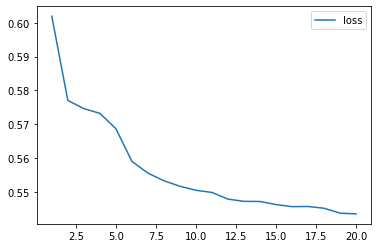

In [128]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<AxesSubplot:>

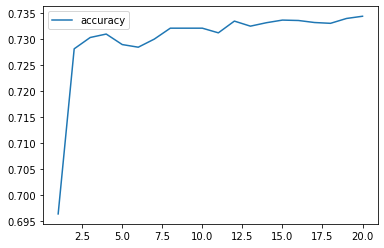

In [129]:
# Plot the accuracy
df.plot(y="accuracy")


In [136]:
from sklearn.datasets import make_moons

In [137]:
# Creating dummy non-linear data
X_train, y_train = make_moons(n_samples=1000, noise=0.08, random_state=100)

In [139]:
y_train = y_train.reshape(-1, 1)

In [140]:
# Creating a DataFrame to plot the non-linear dummy data
df_train = pd.DataFrame(X_train, columns=["Feature 1", "Feature 2"])
df_train["Target"] = y_train
df_train.head()

,Feature 1,Feature 2,Target
0,0.001898,1.029100,0
1,-0.386243,0.647161,0
2,0.025843,0.324721,1
3,-0.822322,0.528084,0
4,0.099996,0.078293,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

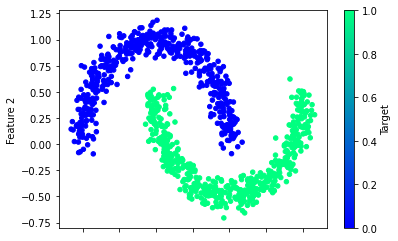

In [143]:
# Plotting the non-linear dummy data
df_train.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [144]:
# Set the file path for the first alternative model
file_path = Path("AlphabetSoup.h5")

# Export your model to a HDF5 file
nn_A1.save(file_path)

In [145]:
# Set the file path for the second alternative model
file_path = Path("AlphabetSoup.h5")

# Export your model to a HDF5 file
nn_A2.save(file_path)